In [1]:
from tifffile import imread, imsave
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import sys
sys.path.append("./lib")
import morphological_operations as mo
import image_process_and_save as ips

In [2]:
import numpy as np
from copy import deepcopy

''' size : size of original 3D numpy matrix A.
    radius : radius of circle inside A which will be filled with ones. 
'''
size, radius = 64, 5

''' A : numpy.ndarray of shape size*size*size. '''
A = np.zeros((size,size, size)) 

''' AA : copy of A (you don't want the original copy of A to be overwritten.) '''
AA = deepcopy(A) 

''' (x0, y0, z0) : coordinates of center of circle inside A. '''
x0, y0, z0 = int(np.floor(A.shape[0]/2)), \
        int(np.floor(A.shape[1]/2)), int(np.floor(A.shape[2]/2))


for x in range(AA.shape[0]):
    for y in range(AA.shape[1]):
        for z in range(AA.shape[2]):   
            d = radius*radius*radius - (x0-x)**2 - (y0-y)**2 - (z0-z)**2 
            if d <= 0: AA[x,y,z] = -1
            elif d >= 0: AA[x,y,z] = 1

In [3]:
AA.shape

(64, 64, 64)

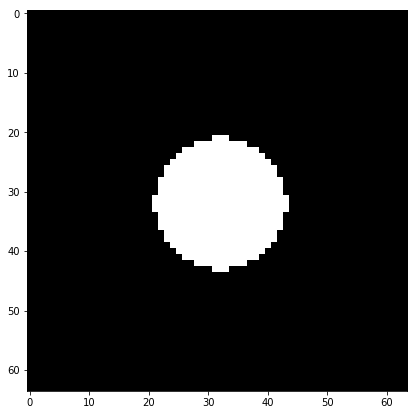

In [4]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(AA[int(AA.shape[0]/2)], cmap='gray')
None

In [5]:
# flatten stack to get a 1D array
x_bin = AA.flatten();

In [6]:
x_bin.shape

(262144,)

In [7]:
# save flat image stack as binary file
path = '/Users/jstark/Desktop/image_examples/'
filename = 'sphere'
ips.save_array_toBin(x_bin, path, filename)

# Save image size in #pixels / axis as csv file
dim = np.asarray(AA.shape)
np.savetxt('%s/size_%s.csv' % (path, filename), dim, fmt='%i', delimiter=',')